In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import scipy.stats as st

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, f1_score, recall_score
from sklearn import tree

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
# !pip install lightgbm

In [3]:
df = pd.read_csv("data\mushroom_cleaned.csv")
df.head(3)
df_second = pd.read_csv("data\secondary_data.csv", sep=";")

<Axes: >

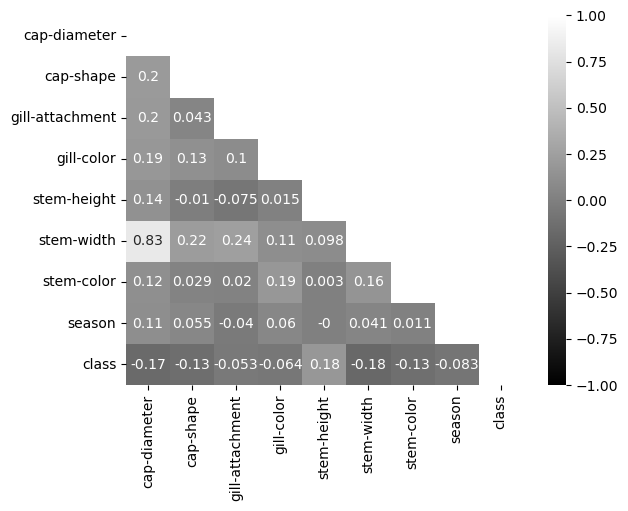

In [4]:
df_corr = df.corr().round(3)

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="gray")

In [5]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [6]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [7]:
features = df.drop(columns=["class"])
target = df["class"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7189784399000648

In [10]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)

knn10 = KNeighborsClassifier(n_neighbors=10)

knn10.fit(X_train_norm, y_train)
pred = knn10.predict(X_test_norm)
knn10.score(X_test_norm, y_test)

0.9900990099009901

In [ ]:
pplot = sns.pairplot(df, hue="class", corner=True)

KeyboardInterrupt: 

In [ ]:
pplot.savefig("out.png")

In [ ]:
f1_score(y_test, pred, average='binary')

**# TESTING SECONDARY DATA FOR COMPLETION**

6. Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w

In [ ]:
df_second.isna().sum()

In [ ]:
df_dropped = df_second.dropna(how="all")
dropped_list = ["stem-root","veil-type","veil-color","stem-surface","spore-print-color"]
df_dropped = df_dropped.drop(columns=dropped_list)

In [ ]:
df_dropped.isna().sum()

In [ ]:
df_dropped.info()

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop="first")
enc_2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop="first")

In [ ]:
categorical_data = df_dropped.select_dtypes(include=['object']).columns.tolist()[1:]

In [ ]:
hot_encoded = enc.fit_transform(df_dropped[categorical_data])

In [ ]:
hot_encoded_df = pd.DataFrame(hot_encoded, columns=enc.get_feature_names_out(categorical_data))

In [ ]:
df_encoded = pd.concat([df_dropped, hot_encoded_df], axis=1)
df_encoded = df_encoded.drop(categorical_data, axis=1)

In [ ]:
df_encoded["class"] = pd.get_dummies(df_encoded["class"], dtype="int", drop_first=True)

In [ ]:
features = df_encoded.select_dtypes(include="number").drop(columns=["class"])
target = df_encoded["class"]

In [ ]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
df_encoded.head(3).T

In [ ]:
knn10.fit(X_train_second, y_train_second)

In [ ]:
knn10.score(X_test_second, y_test_second)

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
clf_tree = clf.fit(X_train_second, y_train_second)

In [ ]:
clf.score(X_test_second, y_test_second)

In [ ]:
tree.plot_tree(clf_tree)
plt.show()

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=15,random_state=42)
model2 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=15,random_state=42)
model3= lgb.LGBMClassifier(learning_rate=0.09,max_depth=15,random_state=42)

model.fit(X_train_second, y_train_second, eval_set=[(X_test_second, y_test_second),(X_train_second, y_train_second)],eval_metric='logloss')

In [ ]:
model.score(X_test_second, y_test_second)

In [ ]:
lgb.plot_importance(model, figsize=(10,20))

In [ ]:
lgb.plot_metric(model)

# NOTES:

* Bin the less important categories
* Graph the results
* Limit the variables?
* Fix Recall
* Logistic Regression
  

In [ ]:
normalizer = MinMaxScaler()
normalizer.fit(X_train_second)

X_train_norm_s = pd.DataFrame(normalizer.transform(X_train_second), columns=X_train_second.columns)
X_test_norm_s = pd.DataFrame(normalizer.transform(X_test_second), columns=X_test_second.columns)

model2.fit(X_train_norm_s, y_train_second, eval_set=[(X_test_norm_s, y_test_second),(X_train_norm_s, y_train_second)],eval_metric='logloss')

In [ ]:
model2.score(X_test_norm_s, y_test_second)

In [ ]:
sample = X_test_norm_s.sample()
model2.predict_proba(sample)

In [ ]:
df_dropped.head(3)

In [ ]:
df_dropped["gill-color"].value_counts() #w, y, p, n

In [ ]:
df_dropped["stem-color"].value_counts()

In [ ]:
df_dropped["gill-attachment"].value_counts() #p, x, s, e

In [ ]:
df_dropped["gill-spacing"] = df_dropped["gill-spacing"].apply(lambda x: 0 if x=="c" else (1 if x=="d" else 2))
df_dropped["gill-color"] = df_dropped["gill-color"].apply(lambda x: 0 if x=="w" else (1 if x=="n" else (2 if x=="y" else 3)))
df_dropped["stem-color"] = df_dropped["stem-color"].apply(lambda x: 0 if x=="w" else (1 if x=="n" else (2 if x=="y" else 3)))
df_dropped["gill-attachment"] = df_dropped["gill-attachment"].apply(lambda x: 0 if x=="a" else 
                                                                    (1 if x=="d" else 
                                                                     (2 if x=="x" else 
                                                                      (3 if x=="p" else 
                                                                       (4 if x=="e" else 5)))))


In [ ]:
df_dropped.drop(columns=["habitat", "season", "has-ring", "ring-type", "cap-surface"], inplace=True)

In [ ]:
categorical_data = df_dropped.select_dtypes(include=['object']).columns.tolist()[1:]
hot_encoded = enc_2.fit_transform(df_dropped[categorical_data])
hot_encoded_df = pd.DataFrame(hot_encoded, columns=enc_2.get_feature_names_out(categorical_data))
df_encoded = pd.concat([df_dropped, hot_encoded_df], axis=1)
df_encoded = df_encoded.drop(categorical_data, axis=1)
df_encoded["class"] = pd.get_dummies(df_encoded["class"], dtype="int", drop_first=True)

features = df_encoded.select_dtypes(include="number").drop(columns=["class"])
target = df_encoded["class"]

In [ ]:
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
dropped_corr = df_encoded.corr().round(3)

mask = np.zeros_like(dropped_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))
pplot_2 = sns.heatmap(dropped_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="mako")
pplot_2.savefig("heatmap.png")